Original length: 140.32802721088436
Saving spectrogram to spect/full/saints.mp3.png
Reduced length: 60.0
Original length (again): 140.32802721088436
Saving spectrogram to spect/trimmed/saints.mp3.trimmed.png
Original length: 196.51201814058956
Saving spectrogram to spect/full/jump.mp3.png
Reduced length: 60.0
Original length (again): 196.51201814058956
Saving spectrogram to spect/trimmed/jump.mp3.trimmed.png
Original length: 224.64
Saving spectrogram to spect/full/boatmen.mp3.png
Reduced length: 60.0
Original length (again): 224.64
Saving spectrogram to spect/trimmed/boatmen.mp3.trimmed.png


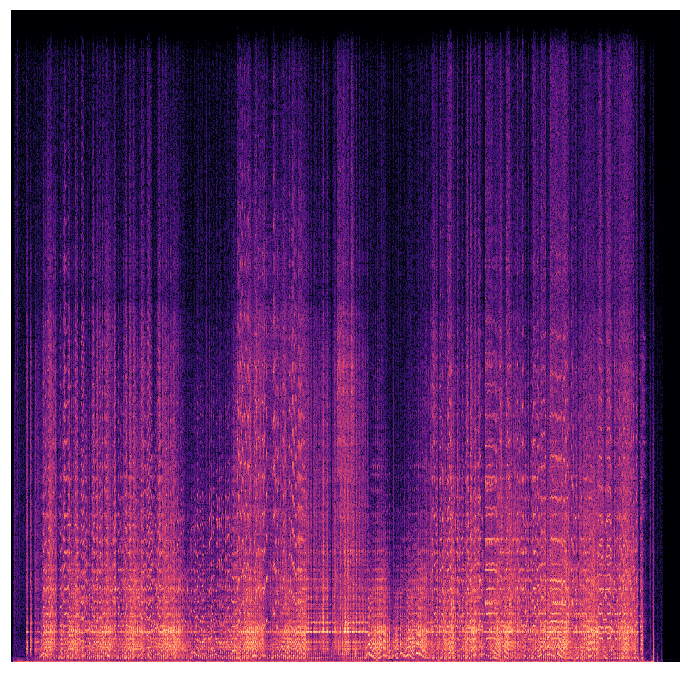

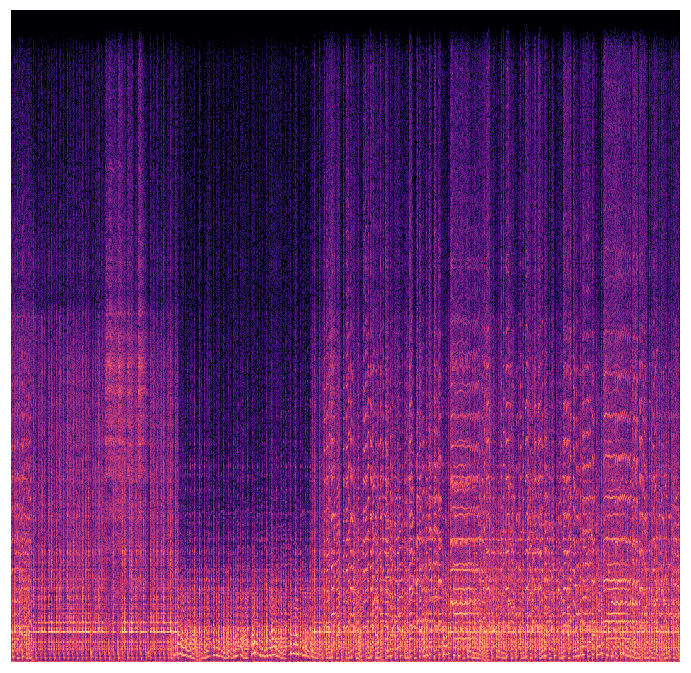

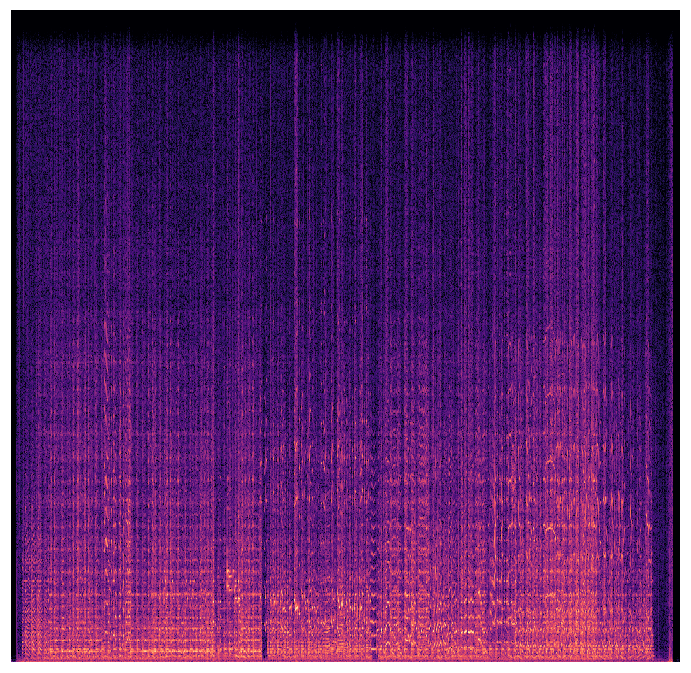

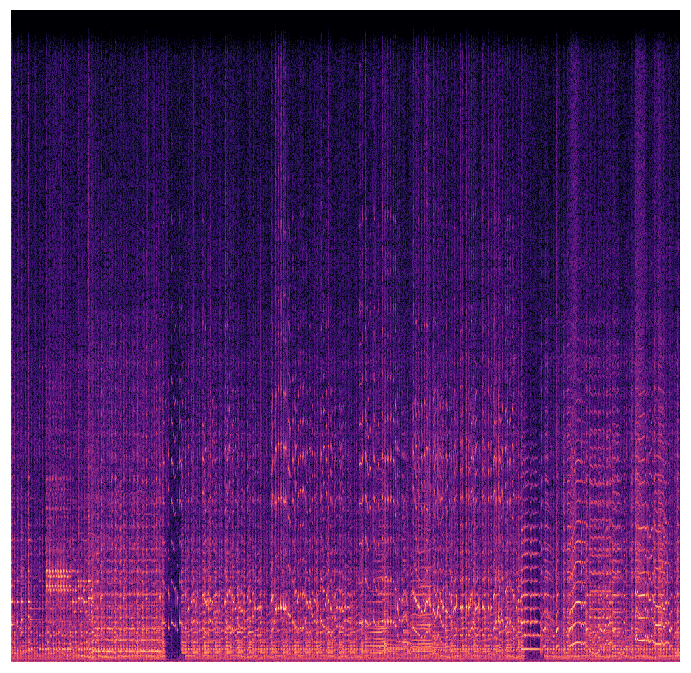

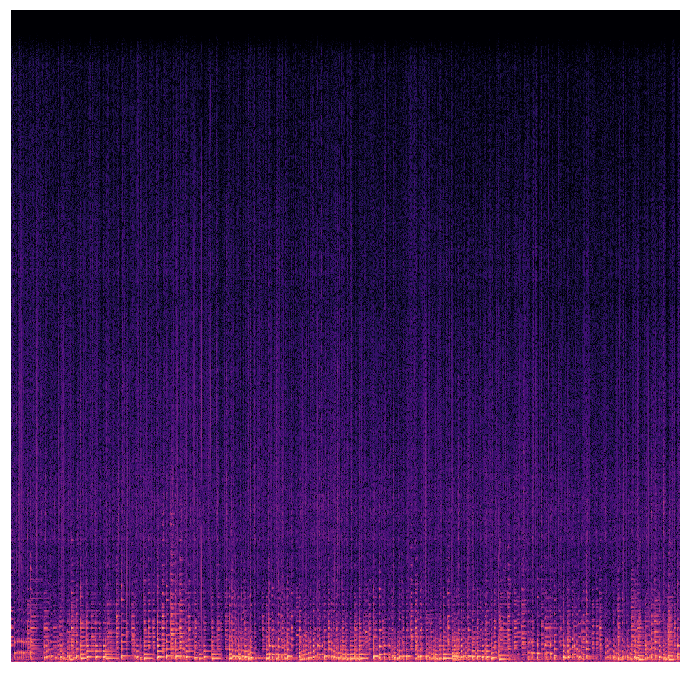

In [2]:
# Beat tracking example
from __future__ import print_function
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Extract audio data from a sample
#     audiodata = numpy float array
#     samplerate = int
#     start = seconds
#     length = seconds
def extract(audiodata, samplerate, start=60, length=60):
    if start == None or length == None: 
        return audiodata
    # get the length of the audio data.
    duration = librosa.core.get_duration(audiodata)
    # Check to see that start + length < duration 
    if start + length > duration: 
        raise ValueError('Requested time longer than audio duration', str(start), str(length), str(duration)) 
    # Calculate where the start would be, based on the sample rate
    startframe = start * samplerate
    # Calculate where the end would be, based on the sample rate
    endframe = (start + length) * samplerate
    # Return a slice of the numpy array
    return audiodata[startframe:endframe]

def show_spectrogram(audio_dat, filename):
    print("Saving spectrogram to " + filename)
    fig = plt.figure(figsize=(12, 12))
    S = librosa.stft(audio_dat)
    M = librosa.core.magphase(S)[0]
    D = librosa.amplitude_to_db(M, ref=np.max)
    ax = plt.subplot(111)
    ax.set_frame_on(False)
    plt.axis('off')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    librosa.display.specshow(D, y_axis='linear')
    plt.savefig(filename, dpi=100, bbox_inches='tight', pad_inches=0.0)

for f in ["saints.mp3", "jump.mp3", "boatmen.mp3"]:
    (y, sr) = librosa.load(f)
    print("Original length: " + str(librosa.core.get_duration(y)))
    show_spectrogram(y, "spect/full/" +f + ".png")
    t = extract(y, sr)
    print("Reduced length: " + str(librosa.core.get_duration(t)))
    print("Original length (again): " + str(librosa.core.get_duration(y)))
    show_spectrogram(t, "spect/trimmed/" + f + ".trimmed.png")